# Feed Forward NN

Network Building of the Feed Forward Neural Network to recognise the Handwritten digits.
*Dataset*: MNIST datasets of **Handwritten digits**
* Input Layer Size=784
* No. Hidden Layer=1
* Hidden Layer Size= 100
* Output Layer Size=10


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1=nn.Linear(784, 100)
        self.fc2=nn.Linear(100, 10)

        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        x=self.fc1(x)
        x=self.sigmoid(x)
        x=self.fc2(x)

        x=F.softmax(x, dim=1)
        return x

In [3]:
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [20]:
params = list(net.named_parameters())
total_params=0
for name, param in params:
    print(name, ":", param.shape)
    total_params+=np.sum(np.prod(param.shape))
print("\nTotal parameters in the network : " , total_params)

fc1.weight : torch.Size([100, 784])
fc1.bias : torch.Size([100])
fc2.weight : torch.Size([10, 100])
fc2.bias : torch.Size([10])

Total parameters in the network :  79510


In [5]:
apply_transforms= transforms.Compose([transforms.ToTensor()])
Batchsize=10

trainset= datasets.MNIST(root='./data', train=True, download=False, transform=apply_transforms)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=Batchsize, shuffle=True)


In [6]:
data1=next(iter(trainloader))
input1, label1=data1

label1

tensor([2, 6, 2, 2, 4, 7, 0, 3, 0, 9])

In [7]:
input1.size()

torch.Size([10, 1, 28, 28])

In [8]:
input1.view(input1.shape[0], -1).shape

torch.Size([10, 784])

In [9]:
output1=net(input1.view(input1.shape[0], -1))
output1

tensor([[0.0964, 0.1697, 0.1021, 0.1048, 0.0707, 0.0739, 0.1075, 0.1044, 0.0917,
         0.0789],
        [0.1002, 0.1674, 0.1041, 0.1036, 0.0694, 0.0716, 0.1106, 0.1007, 0.0928,
         0.0796],
        [0.0932, 0.1771, 0.1041, 0.1030, 0.0692, 0.0721, 0.1100, 0.1043, 0.0900,
         0.0770],
        [0.1036, 0.1692, 0.1038, 0.1042, 0.0697, 0.0712, 0.1054, 0.1034, 0.0932,
         0.0763],
        [0.0970, 0.1699, 0.1048, 0.1047, 0.0681, 0.0718, 0.1089, 0.1076, 0.0897,
         0.0775],
        [0.0999, 0.1674, 0.1037, 0.1044, 0.0725, 0.0732, 0.1073, 0.1032, 0.0924,
         0.0762],
        [0.1035, 0.1658, 0.1048, 0.1062, 0.0688, 0.0724, 0.1093, 0.1002, 0.0936,
         0.0754],
        [0.0991, 0.1723, 0.1030, 0.1073, 0.0670, 0.0750, 0.1082, 0.1015, 0.0911,
         0.0755],
        [0.1042, 0.1692, 0.1044, 0.1062, 0.0660, 0.0698, 0.1082, 0.1028, 0.0957,
         0.0737],
        [0.0963, 0.1695, 0.1059, 0.1055, 0.0674, 0.0754, 0.1133, 0.1033, 0.0863,
         0.0771]], grad_fn=<

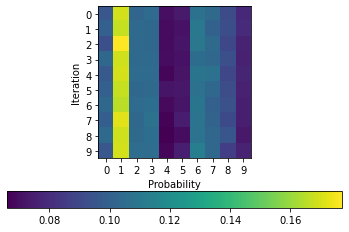

In [21]:
def show_tensor(x):
    plt.figure()
    plt.xticks(np.arange(0,10,1))
    plt.yticks(np.arange(0,10,1))
    plt.xlabel("Probability")
    plt.ylabel("Iteration")
    plt.imshow(x)
    plt.colorbar(orientation='horizontal')
    plt.show
show_tensor(output1.detach().numpy())